<a href="https://colab.research.google.com/github/ManavD522/Employee-Attrition-EDA/blob/main/EmployeeAttrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Modules used for reading dataset and array manipulation
import pandas as pd
import numpy as np

# Modules to visualize data
import matplotlib.pyplot as plt 
import seaborn as sns

In [ ]:
# Read the contents of the dataset (.csv file)
df = pd.read_csv("/content/drive/MyDrive/Datasets/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Returns the basic general details of the dataset
df.info()

# print the first 5 rows of the dataset
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
# Set 'Category' type for categorical columns
categorical_col = ["Attrition", "BusinessTravel", "Department", "Education", "EducationField", "EnvironmentSatisfaction", "Gender", "JobInvolvement", "JobLevel", "JobRole", "JobSatisfaction", "MaritalStatus", "OverTime", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]
for col in categorical_col:
  df[col] = df[col].astype('category')

# Set 'Numeric' type for numeric columns
numeric_col = ["Age", "DailyRate", "DistanceFromHome", "EmployeeNumber", "HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager"]
for ncol in numeric_col:
  df[ncol] = df[ncol].astype('int64')

# Remove unnecessary columns that does not affect the dataset
df = df.drop("Over18", axis=1)
df = df.drop(columns='EmployeeCount')
df = df.drop(columns='StandardHours')

In [ ]:
# Verify the general details of the dataset after removing fields etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       1470 non-null   int64   
 1   Attrition                 1470 non-null   category
 2   BusinessTravel            1470 non-null   category
 3   DailyRate                 1470 non-null   int64   
 4   Department                1470 non-null   category
 5   DistanceFromHome          1470 non-null   int64   
 6   Education                 1470 non-null   category
 7   EducationField            1470 non-null   category
 8   EmployeeNumber            1470 non-null   int64   
 9   EnvironmentSatisfaction   1470 non-null   category
 10  Gender                    1470 non-null   category
 11  HourlyRate                1470 non-null   int64   
 12  JobInvolvement            1470 non-null   category
 13  JobLevel                  1470 non-null   catego

As obvserved in the above cell, the dataset contains no null values. Hence the null value checking step has been skipped.

In [ ]:
# Check if duplicate values exists in the dataset. If none exists, then print "No duplicate values"
if len(df[df.duplicated()]) > 0:
  print("NO. of duplicate values are: ", len(df[df.duplicated()]))

  print(df[df.duplicated(keep=false)])
else:
  print("No duplicate values.")

No duplicate values.


In [ ]:
# Returns top 5 unique values.
def top5(df):
    """Given dataframe, identify top 5 unique values"""
    columns = df.select_dtypes(include=['category', 'int64'])
    for col in columns:
      print("Top 5 unique values of ", col)
      print(" ")
      print(df[col].value_counts().reset_index().head().rename(columns = {"index" : col, col : "Count"}))
      print("\n\n")
      
# UDF to perform EDA on categorical data
def categorical_eda(df): 
  print("Display unique categorical data in the dataset")
  print(df.select_dtypes(include=['category']).nunique())
  top5(df)

The above cell helps us understand the unique values in the dataset along with their value count.

In [ ]:
def categorical_eda_graph(df):
  # Plot count distribution of categorical data
  for col in df.select_dtypes(include='category').columns:
    sns.catplot(x=col, kind="count", data=df).set_xticklabels(rotation=90)

Display unique categorical data in the dataset
Attrition                   2
BusinessTravel              3
Department                  3
Education                   5
EducationField              6
EnvironmentSatisfaction     4
Gender                      2
JobInvolvement              4
JobLevel                    5
JobRole                     9
JobSatisfaction             4
MaritalStatus               3
OverTime                    2
PerformanceRating           2
RelationshipSatisfaction    4
StockOptionLevel            4
WorkLifeBalance             4
dtype: int64
Top 5 unique values of  Age
 
   Age  Count
0   35     78
1   34     77
2   31     69
3   36     69
4   29     68



Top 5 unique values of  Attrition
 
  Attrition  Count
0        No   1233
1       Yes    237



Top 5 unique values of  BusinessTravel
 
      BusinessTravel  Count
0      Travel_Rarely   1043
1  Travel_Frequently    277
2         Non-Travel    150



Top 5 unique values of  DailyRate
 
   DailyRate  Count
0    

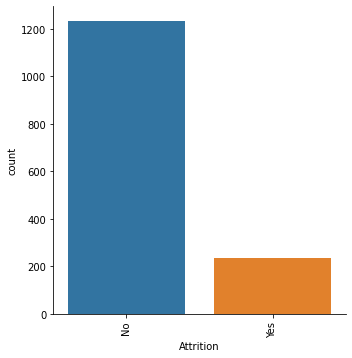

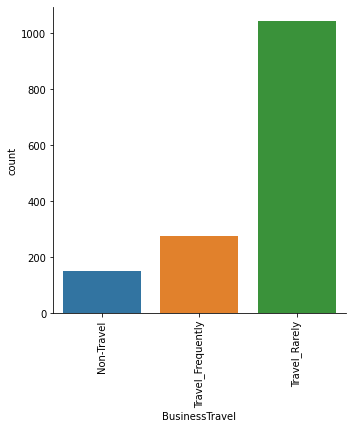

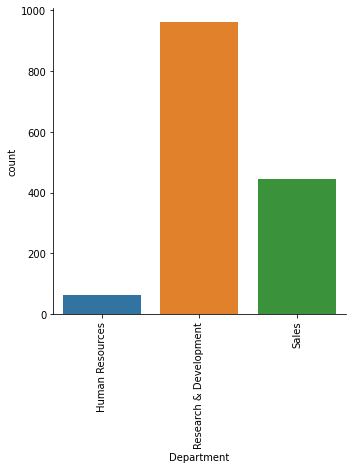

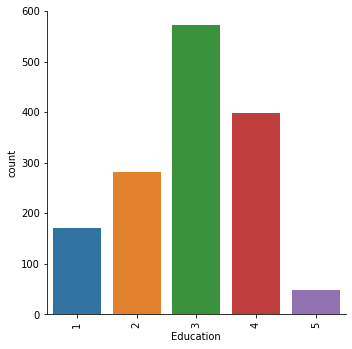

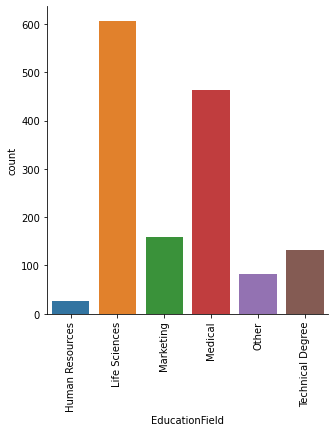

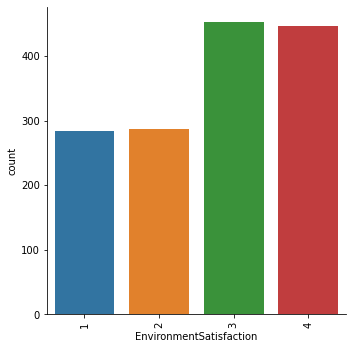

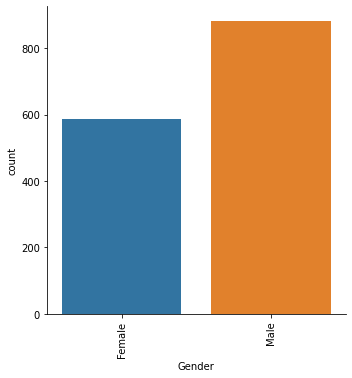

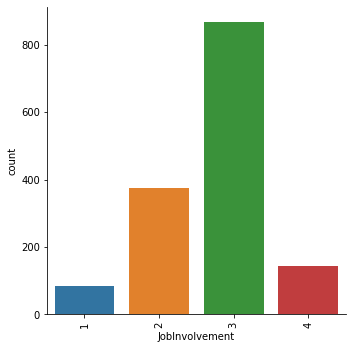

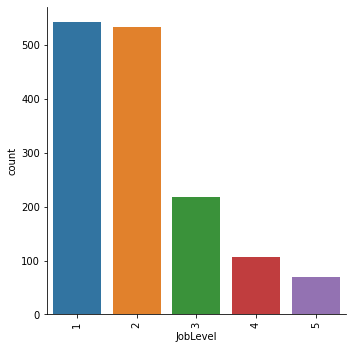

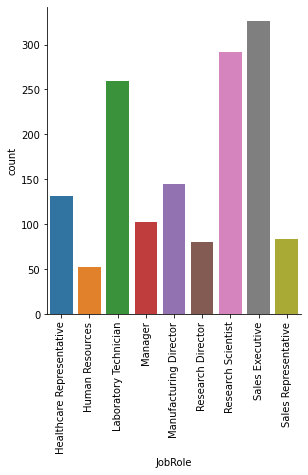

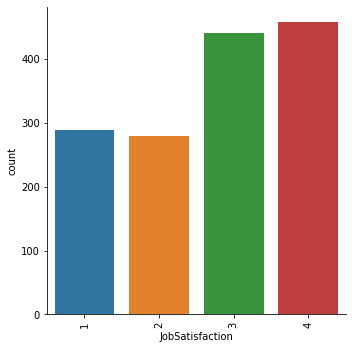

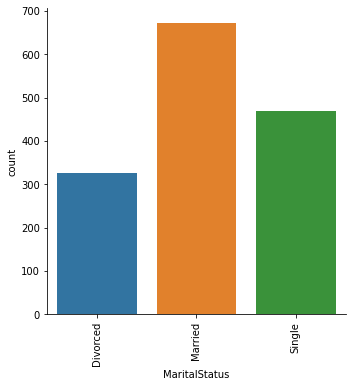

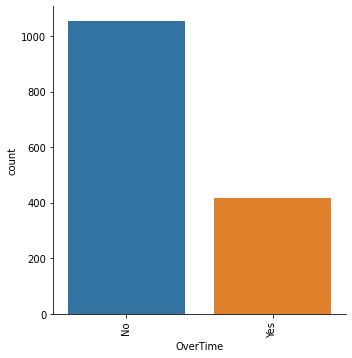

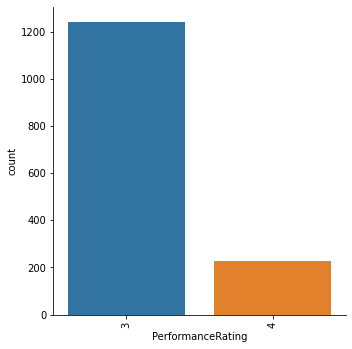

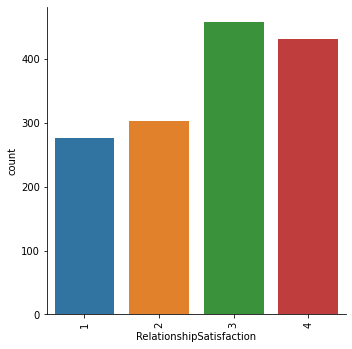

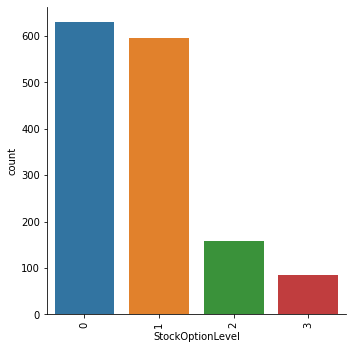

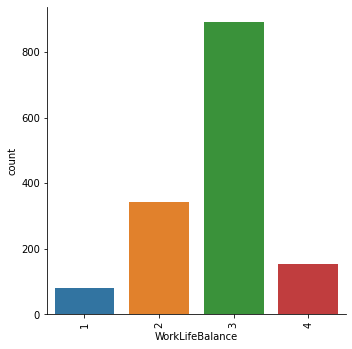

In [ ]:
# Call both the functions for Categorical EDA
categorical_eda(df)
categorical_eda_graph(df)

The graphs presented above give us the clear view of the count of employees in each and every attribute/column.

In [ ]:
# Get basic statistics of the dataset
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.00,4919.0,8379.00,19999.0
MonthlyRate,1470.0,14313.103401,7117.786044,2094.0,8047.00,14235.5,20461.50,26999.0
NumCompaniesWorked,1470.0,2.693197,2.498009,0.0,1.00,2.0,4.00,9.0
PercentSalaryHike,1470.0,15.209524,3.659938,11.0,12.00,14.0,18.00,25.0
TotalWorkingYears,1470.0,11.279592,7.780782,0.0,6.00,10.0,15.00,40.0


This gives us basic statistics of the dataset like Mean, Frequency, Standard Deviation, Quartiles and Minimum and Maximum entry.


To check: 
Distribution of numeric data


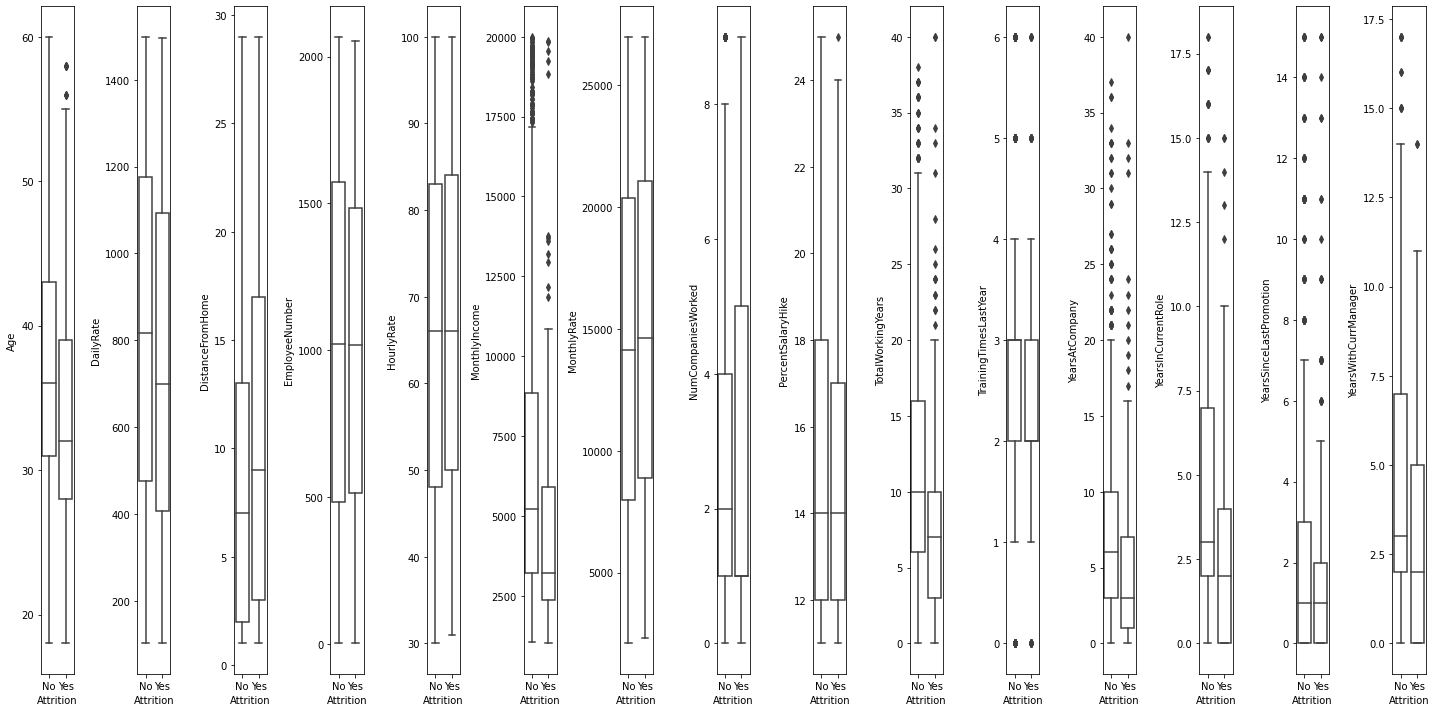

In [ ]:
# Call the function which performs distribution of numerical data using box-plot

numeric_eda(df, hue='Attrition')

In [ ]:
# UDF to perform Edistribution of numerical data using box-plot

def numeric_eda(df, hue=None):
    """Given dataframe, EDA of numeric data"""
    print("\nTo check: \nDistribution of numeric data")
    columns = df.select_dtypes(include=np.number).columns
    figure = plt.figure(figsize=(20, 10))
    figure.add_subplot(1, len(columns), 1)
    for index, col in enumerate(columns):
        if index > 0:
            figure.add_subplot(1, len(columns), index + 1)
        sns.boxplot(x="Attrition", y=col, data=df, boxprops={'facecolor': 'None'})
    figure.tight_layout()
    plt.show()

In [ ]:
# A list of columns that is not relevant to attrition
neg_col = ["Attrition", "DailyRate", "Department", "EducationField", "EmployeeNumber", "HourlyRate"]

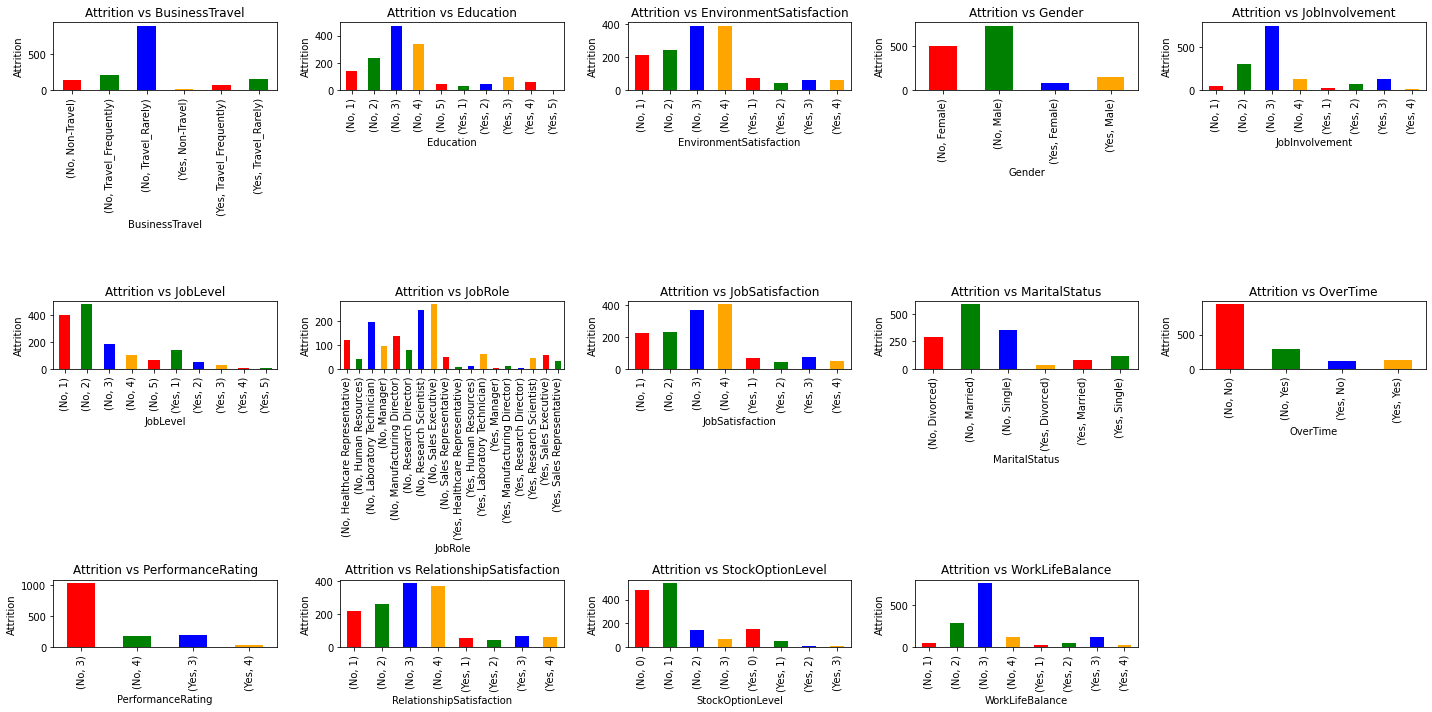

In [ ]:
count = 1
# iterate through each categorical column
for col in categorical_col:
  # if the column is not in the blocklist 
    if col not in neg_col:
      # create a subplot (a plot within plot)
        plt.subplot(3, 5, count)

      # group categorical data by attrition and that particular column, and plot a bar graph
        df.groupby(['Attrition', col]).size().plot(kind='bar', figsize=(20, 10), color=["Red", "Green", "Blue", "Orange"])
        plt.title(f'Attrition vs {col}')
        plt.xlabel(col)
        plt.ylabel('Attrition')
        count += 1
plt.tight_layout()

The bar graphs of Attrition against various attributes tell us how each of them affects an employee's attrition.

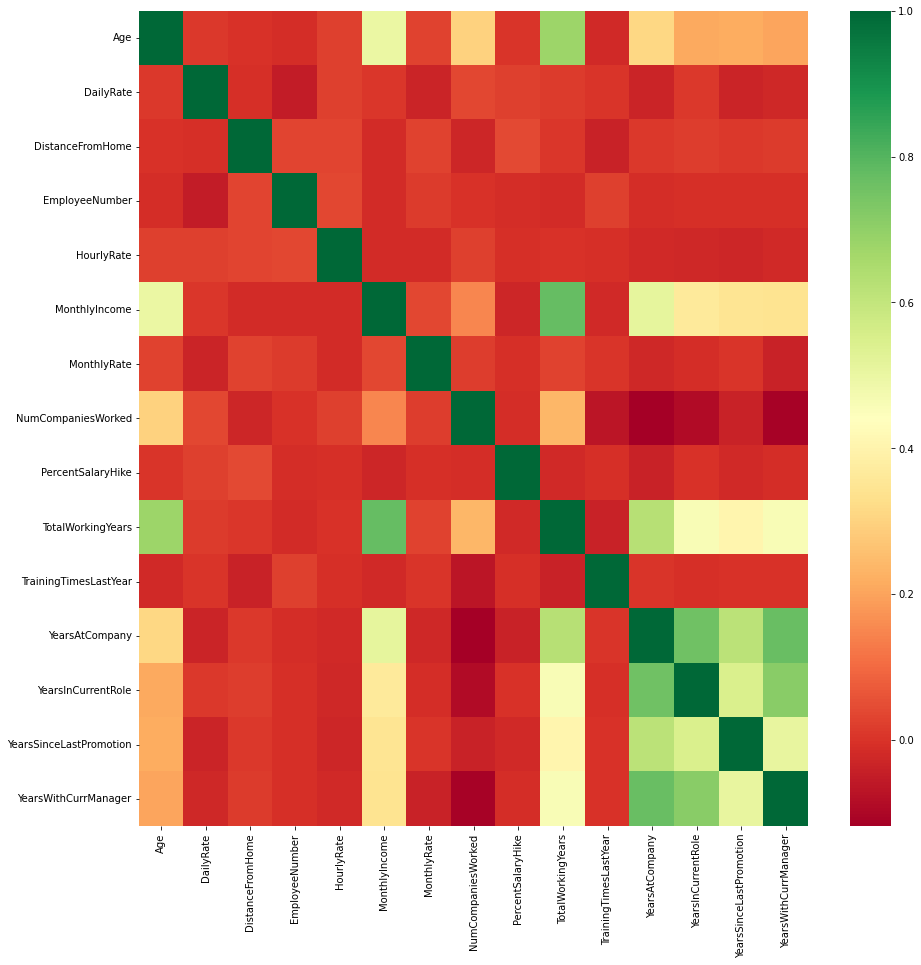

In [ ]:
fig, ax = plt.subplots(figsize=(15,15))
# A heatmap of the covariance matrix of the dataset that determines the correlation between two column
sns.heatmap(df.corr(), cmap='RdYlGn')

The heatmap gives us the correlation among all the attributes.

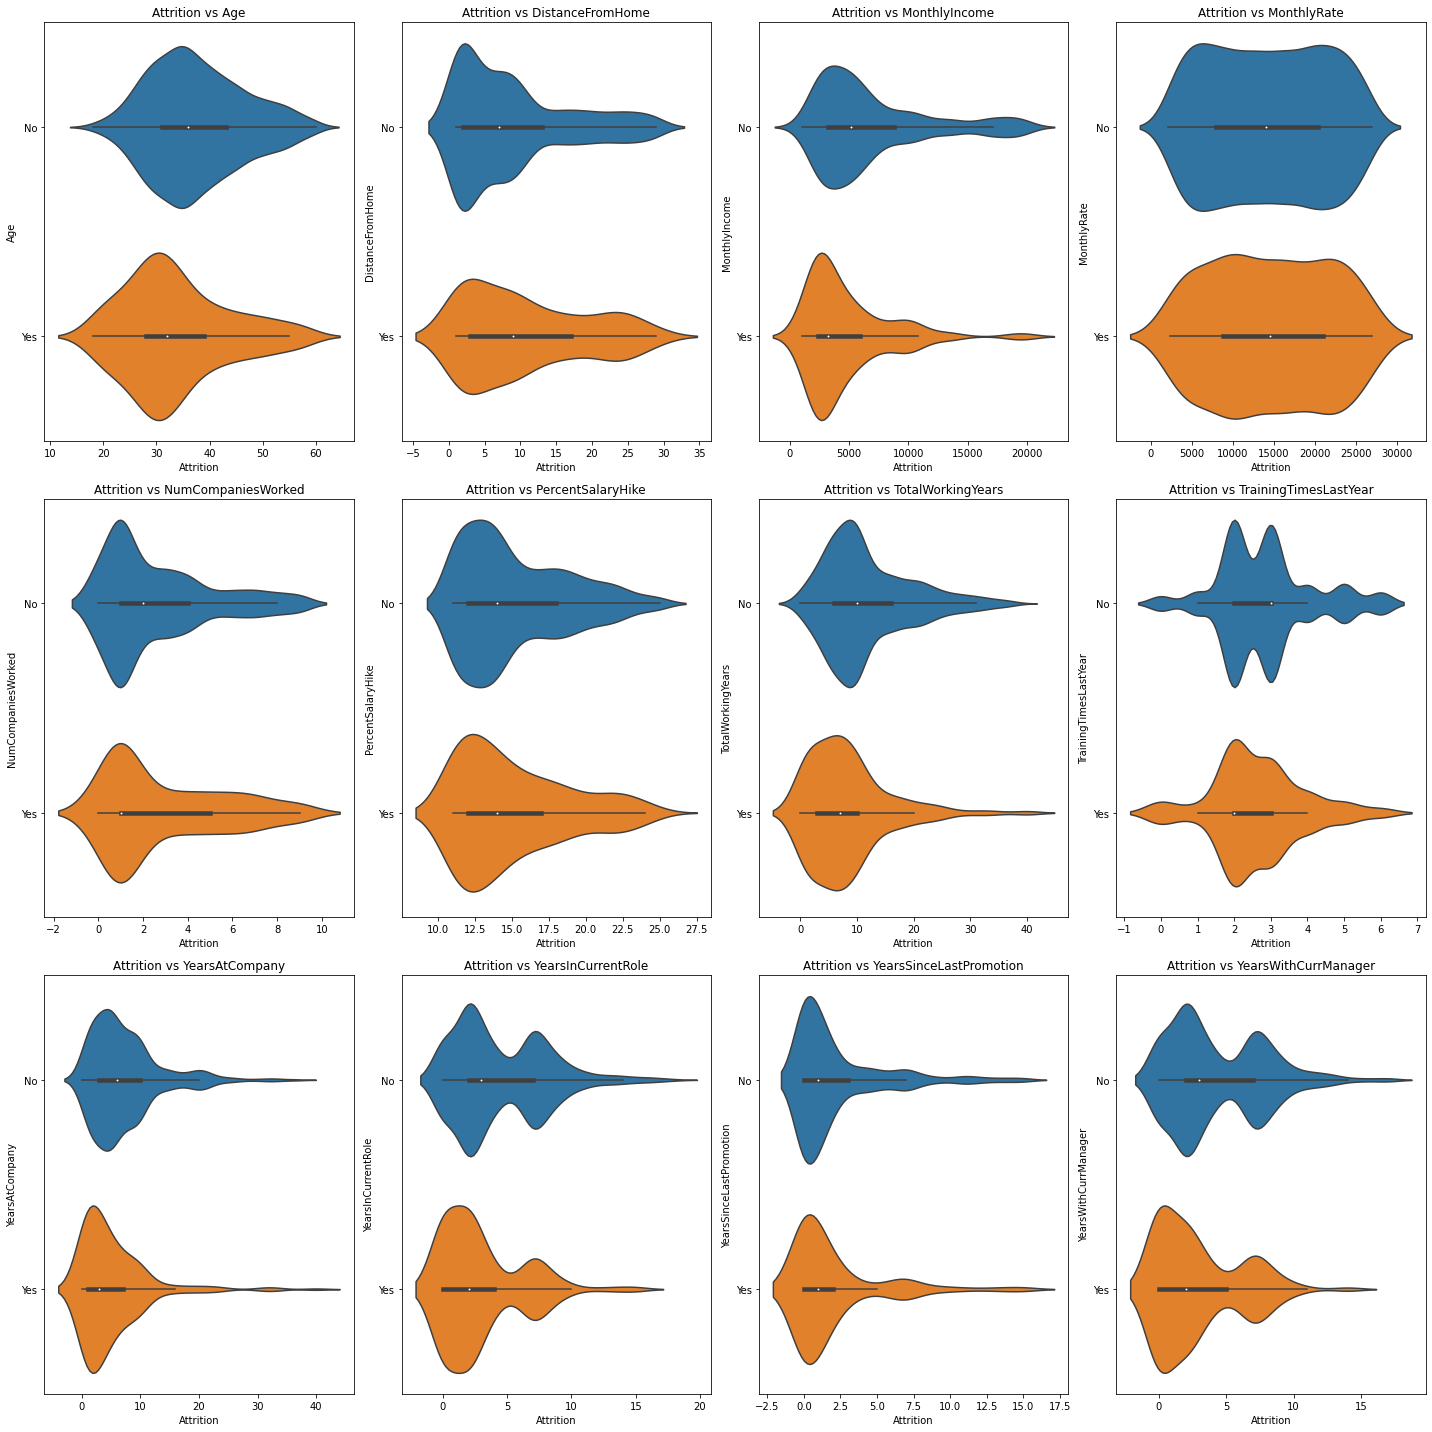

In [ ]:
# set figsize for each plot
plt.rcParams["figure.figsize"] = (20, 20)

count = 1
# for each numerical column in the dataset
for col in numeric_col:
  # if the column is not in the blocklist
    if col not in neg_col:
      # generate a subplot (a plot within a plot)
        plt.subplot(3, 4, count)
      # visualize the distribution of numeric values of a specific column against the attrition
        sns.violinplot(x=col, y="Attrition", data=df)
        plt.title(f'Attrition vs {col}')
        plt.xlabel("Attrition")
        plt.ylabel(col)
        count += 1
plt.tight_layout()
plt.show()

The violin plots give us simple distribution of numeric values of specific columns against attrition.